In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd


2022-11-30 22:01:00.435238: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-30 22:01:00.435306: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [4]:
#check if data contains NaN values
data.isnull().values.any()

False

In [5]:
#Normalization
normalized_data = (data-data.min())/(data.max()-data.min())


In [6]:
#split data into train-,test- and valifdationset
train, validate, test = np.split(normalized_data.sample(frac=1), [int(.6*len(normalized_data)), int(.8*len(normalized_data))])


In [7]:
model =tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_shape=(13,), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(1,activation='linear')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])


2022-11-30 22:01:08.127320: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-30 22:01:08.127450: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-30 22:01:08.127544: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (roger-ThinkPad-L590): /proc/driver/nvidia/version does not exist
2022-11-30 22:01:08.129956: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:

X_train = train.drop(labels='MEDV',axis=1).values
y_train = train['MEDV'].values

X_test = test.drop(labels='MEDV',axis=1).values
y_test = test['MEDV'].values


In [9]:

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)
history = model.fit(X_train,y_train,batch_size=40,epochs=170,validation_data=(X_test, y_test),verbose=0,callbacks=[callback])

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)


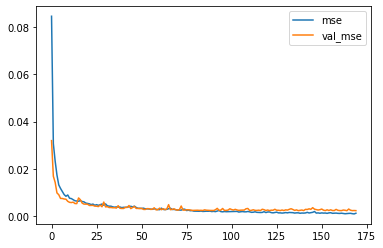

In [10]:
history_df[['mse','val_mse']].plot();


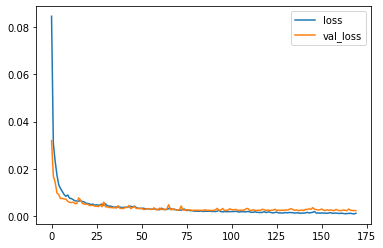

In [11]:
history_df[['loss','val_loss']].plot();


In [13]:
X_validate = validate.drop(labels='MEDV',axis=1).values
y_validate = validate['MEDV'].values

results = model.evaluate(X_validate, y_validate, batch_size=30)
print("test loss",results[0])
print( "test mse:", results[1])

4/4 [==============================] - 0s 7ms/step - loss: 0.0072 - mse: 0.0072
test loss 0.007220297586172819
test mse: 0.007220297586172819
